# Housing Prices Prediction using DT and KNN Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv("bangalore.csv")  #importing diabetes dataset
house_data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [3]:
h_data = house_data.copy() #copying diabetes data to another variable

In [4]:
h_data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [5]:
h_data.isnull().values.any()       #shows that the diabetes dataset doesn't contain any null values    

False

In [6]:
h_data.count()

Price                  6207
Area                   6207
Location               6207
No. of Bedrooms        6207
Resale                 6207
MaintenanceStaff       6207
Gymnasium              6207
SwimmingPool           6207
LandscapedGardens      6207
JoggingTrack           6207
RainWaterHarvesting    6207
IndoorGames            6207
ShoppingMall           6207
Intercom               6207
SportsFacility         6207
ATM                    6207
ClubHouse              6207
School                 6207
24X7Security           6207
PowerBackup            6207
CarParking             6207
StaffQuarter           6207
Cafeteria              6207
MultipurposeRoom       6207
Hospital               6207
WashingMachine         6207
Gasconnection          6207
AC                     6207
Wifi                   6207
Children'splayarea     6207
LiftAvailable          6207
BED                    6207
VaastuCompliant        6207
Microwave              6207
GolfCourse             6207
TV                  

In [7]:
h_data.shape

(6207, 40)

In [8]:
h_data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


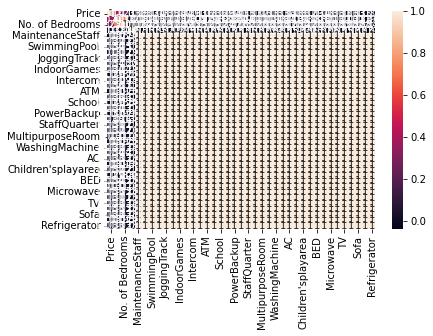

In [9]:
sns.heatmap(h_data.corr(), annot = True)    #greater than zero --> +ve relation
plt.show()                                  #less than zero    --> -ve relation

In [10]:
h_data.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.397626,0.234272,-0.038024,0.030497,0.031976,0.034450,0.029744,0.035339,0.033558,...,0.028814,0.033519,0.029598,0.033460,0.031330,0.033460,0.033460,0.033460,0.030335,0.033460
Area,0.397626,1.000000,0.733010,0.021379,0.008910,0.011436,0.014659,0.011841,0.016572,0.012948,...,0.008811,0.013280,0.010232,0.013166,0.010982,0.013166,0.013166,0.013166,0.009288,0.013166
No. of Bedrooms,0.234272,0.733010,1.000000,-0.015806,0.024080,0.027791,0.031352,0.028554,0.030822,0.028072,...,0.025848,0.027655,0.025736,0.027576,0.025264,0.027576,0.027576,0.027576,0.024300,0.027576
Resale,-0.038024,0.021379,-0.015806,1.000000,-0.034941,-0.032628,-0.034735,-0.032260,-0.032120,-0.029972,...,-0.030221,-0.036578,-0.026156,-0.036538,-0.034582,-0.036538,-0.036538,-0.036538,-0.033874,-0.036538
MaintenanceStaff,0.030497,0.008910,0.024080,-0.034941,1.000000,0.998428,0.997825,0.997381,0.997509,0.997057,...,0.997388,0.998145,0.996514,0.998159,0.998736,0.998159,0.998159,0.998159,0.999025,0.998159
Gymnasium,0.031976,0.011436,0.027791,-0.032628,0.998428,1.000000,0.998789,0.997748,0.998043,0.997460,...,0.998031,0.998325,0.997197,0.998334,0.998976,0.998334,0.998334,0.998334,0.999217,0.998334
SwimmingPool,0.034450,0.014659,0.031352,-0.034735,0.997825,0.998789,1.000000,0.997782,0.998037,0.996813,...,0.997225,0.997858,0.996706,0.997864,0.998366,0.997864,0.997864,0.997864,0.998554,0.997864
LandscapedGardens,0.029744,0.011841,0.028554,-0.032260,0.997381,0.997748,0.997782,1.000000,0.998167,0.997564,...,0.996521,0.996842,0.996338,0.996873,0.997503,0.996873,0.996873,0.996873,0.997692,0.996873
JoggingTrack,0.035339,0.016572,0.030822,-0.032120,0.997509,0.998043,0.998037,0.998167,1.000000,0.997309,...,0.996452,0.996870,0.997017,0.996902,0.997716,0.996902,0.996902,0.996902,0.997853,0.996902
RainWaterHarvesting,0.033558,0.012948,0.028072,-0.029972,0.997057,0.997460,0.996813,0.997564,0.997309,1.000000,...,0.996917,0.996533,0.997442,0.996563,0.997307,0.996563,0.996563,0.996563,0.997617,0.996563


In [11]:
h_data.rename(columns = {'No. of Bedrooms':'noOfBedrooms'},inplace = True)

In [11]:
# after checking the correlation heat map it has been came to notice that the cols like Glucose,BMI,Age,Insulin has highly
#correalted with outcome.so we could use it as features

In [16]:
import seaborn as sns;

In [ ]:
sns.pairplot(h_data,hue = "Price")

In [15]:
from sklearn.metrics import r2_score
def dtAlgo():
    global training_data_accuracy1;
    global test_data_accuracy1;
    #Applying Decision Tree Algorithm
    #importing req libraries for Decision Tree classifier
    from sklearn.tree import DecisionTreeRegressor 
    from sklearn.model_selection import train_test_split
    
    #features
    features_sel = ['Area','noOfBedrooms','Resale','LiftAvailable','SportsFacility']
    X = h_data[features_sel] .values
    #labels
    y = h_data['Price']



    #Train Test Split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 209)

    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X,y)
   

    
    
    lb1 = lben1.get()
    lb2 = lben2.get()
    lb3 = lben3.get()
    lb4 = lben4.get()
    lb5 = lben5.get()
    
    input_data = ([[lb1,lb2,lb3,lb4,lb5]])

    y_pred = regressor.predict(input_data)
    print(y_pred)
    X_test_prediction = regressor.predict(X_test)
    acc = r2_score(X_test_prediction, y_test)
    f_acc = acc*100
    messagebox.showinfo("info","Price Predicted " + str(int(y_pred)) + "  Accuracy Score: " + str(f_acc))
        
def knnAlgo():
    global training_data_accuracy2;
    global test_data_accuracy2;
    #applying KNN Algorithm
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    
    #features
    features_sel = ['Area','noOfBedrooms','Resale','LiftAvailable','SportsFacility']
    X = h_data[features_sel] .values
    #labels
    y = h_data['Price']



    #Train Test Split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 148)

    regressor = KNeighborsRegressor(n_neighbors = 1)
    regressor.fit(X,y)
   

    
    
    lb1 = lben1.get()
    lb2 = lben2.get()
    lb3 = lben3.get()
    lb4 = lben4.get()
    lb5 = lben5.get()
    
    input_data = ([[lb1,lb2,lb3,lb4,lb5]])

    y_pred = regressor.predict(input_data)
    print(y_pred)
    X_test_prediction = regressor.predict(X_test)
    acc = r2_score(X_test_prediction, y_test)
    f_acc = acc*100
    messagebox.showinfo("info","Price Predicted " + str(int(y_pred)) + "  Accuracy Score: " + str(f_acc))
    

        
        

def predictBtn():
    c = Combo1.get()
    if c == "Decision Tree":
        dtAlgo()
    elif c == "K-NearestNeighbour":
        knnAlgo()
    else:
        messagebox.showinfo("Error","Choose the Options Correctly!!!")


from tkinter import *;
from tkinter import ttk;
from PIL import Image,ImageTk;
from tkinter import messagebox
def mainFrame():
    global main_frame;
    global lben1
    global lben2
    global lben3
    global lben4
    global lben5
    global lben6
    global lben7
    global lben8
    global Combo1
    main_frame = Tk();
    main_frame.geometry("1000x600");
    main_frame.title("House Price Prediction System");
    Label(main_frame,text = "House Price Prediction System",justify = "center",font = ("times new roman",35,"bold"),fg = "Red",bg = "light blue",width = 300).pack();
    bg = Image.open("house.jpg").resize((1000,600));
    img = ImageTk.PhotoImage(bg,master = main_frame);
    lbl = Label(main_frame,image = img).pack(pady = 0.5 );
    optlist1 = ["Decision Tree","K-NearestNeighbour"];
    Combo1 = ttk.Combobox(main_frame,values = optlist1,width = 48,font = ("Times New Roman",12));
    Combo1.set("Select Algorithm - ");
    Combo1.place(x = 40,y = 90);
    label1 = Label(main_frame,text = "Enter Values\n⬇",font = ("Times new roman",18,"bold"),bg = "light blue",fg = "black").place(x = 170,y =130);
    lben1 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben1.insert(0,"Area Of the House")
    lben1.place(x = 40,y = 200);
    lben2 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben2.insert(0,"Total Number Of Bedrooms")
    lben2.place(x = 40,y = 240);
    lben3 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben3.insert(0,"Resale")
    lben3.place(x = 40,y = 280);
    lben4 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben4.insert(0,"Lift Facility")
    lben4.place(x = 40,y = 320);
    lben5 = Entry(main_frame,width = 50,borderwidth = 3,font = ("Times New Roman",12));
    lben5.insert(0,"Sports facility")
    lben5.place(x = 40,y = 360);
    
    predButt = Button(main_frame,text = "Predict",font = ("times new roman",17,"bold"),command = predictBtn,fg = "green",bg = "light blue",width = 10).place(x = 165,y = 520);
    #exitButt =  Button(main_frame, text = "Exit",font = ("Ink Free",15,"bold"),fg = "Red",bg = "Black",command = main_frame.destroy,width = 10).place(x = 335,y = 214);
    #forgotpButt =  Button(main_frame, text = "Forgot Password",font = ("Ink Free",15,"bold"),fg = "Red",bg = "Black",width = 16,command = forgotpass).place(x = 482,y = 214);
    main_frame.mainloop();
mainFrame()

[30000000.]


C:\Users\Raunak Kumar\anaconda3\lib\site-packages\sklearn\base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


[30000000.]
